**Nombre:** Pablo Alejandro Aguirre Higuera

**Matrícula:** 263845

**Práctica #27.** Clases No Balanceadas, Evaluación y SVM

**Fecha:** 17/11/2025

#### **1. Carga y Exploración del Dataset**

In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

cancer = load_breast_cancer()
df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)

df['target'] = cancer.target
df['class'] = df['target'].apply(lambda x: cancer.target_names[x])
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0,malignant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0,malignant
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0,malignant
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0,malignant
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0,malignant


Se ha importado con éxito el dataset de *breast cancer*. Los datos se covierten inicialmente a un DataFrame con los valores de las variables predictoras (feature_names). Después se agrega la columna target, la variable objetivo. En lugar de representar la clase con unos y ceros, es mejor identificarlas con su etiqueta correspondiente. Para ello, se aplica una función lambda. Se usa la lista de valores de target [0,1] y la etiquetas ['malignant', 'benign']. En este caso, 0 implica una observación con cáncer y 1 significa libre de cáncer.

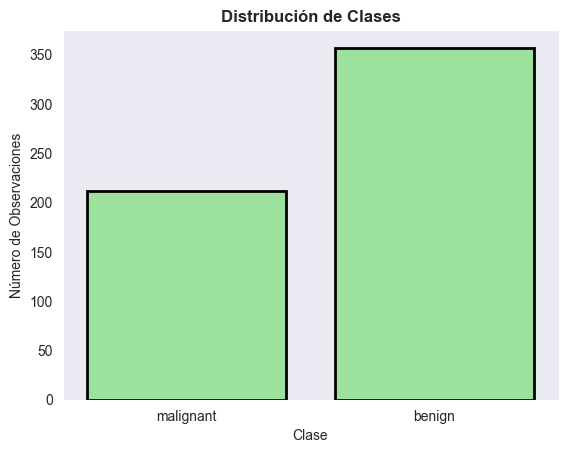

In [2]:
sns.set_style("dark")
sns.countplot(x=df['class'], color='lightgreen', linewidth=2, edgecolor='black')
plt.title("Distribución de Clases", fontweight="bold")
plt.xlabel("Clase")
plt.ylabel("Número de Observaciones")
plt.show()

Existe un desbalance de clases. La clase de elementos benignos tiene casi un 75% más de elementos que la clase de malignos. Esto puede ocasionar que el modelo de máquina de soporte vectorial tenga deficiencias al momento de categorizar correctamente observaciones de la clase de malignos.

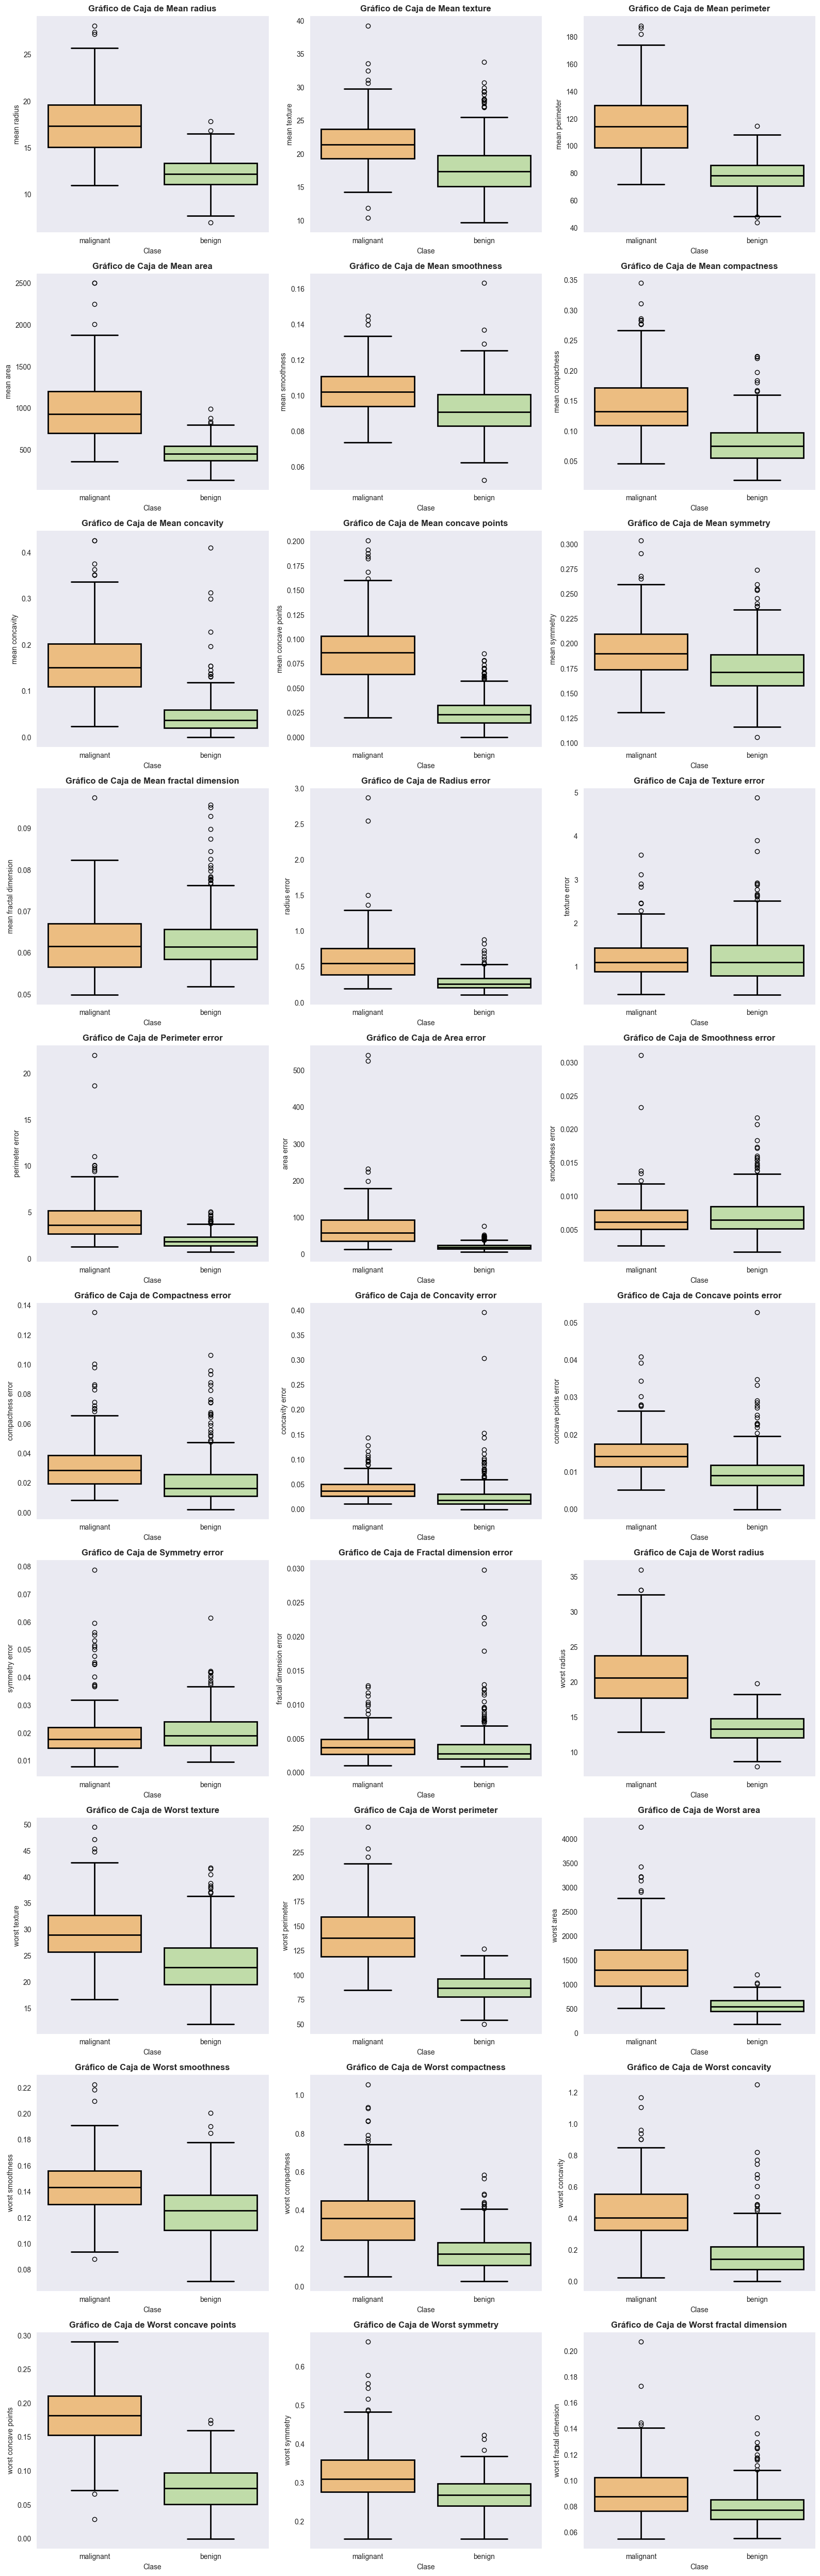

In [3]:
X = df.drop(columns=['target', 'class']) #Se omiten las 2 últimas columnas ya que estas son de clase
plt.figure(figsize=(16, 50))

for i, col in enumerate(X.columns, 1):
    
    plt.subplot(10, 3, i)
    sns.boxplot(x=df['class'], y=df[col], palette="Spectral", hue=df['class'], legend=False, linewidth=2, linecolor='black')
    plt.title(f'Gráfico de Caja de {col.capitalize()}', fontweight='bold')
    plt.xlabel('Clase')

plt.tight_layout()
plt.show()

Observando la dispersión de los datos en cada variable predictora para cada clase, se observa que las variables que parecen tener influencia significativa son: 

mean radius, mean texture, mean perimeter, mean area, mean compactness, mean concavity, mean concave points, radius error, perimeter error, area error, concave points error, worst radius, worst perimeter, worst area, worst compactness, worst concavity y worst concave points

#### **2. Entrenamiento Base con SVM y Análisis del Desbalance**

Accuracy: 0.9596835443037974
              precision    recall  f1-score   support

      benign       0.95      0.94      0.95       109
   malignant       0.90      0.92      0.91        62

    accuracy                           0.94       171
   macro avg       0.93      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171



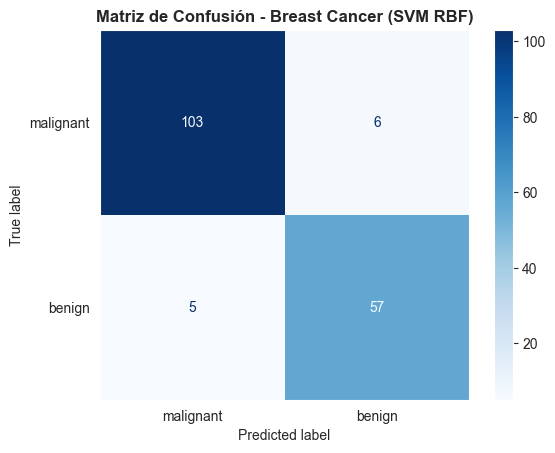

In [4]:
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, cross_val_predict
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

X = X[['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean compactness', 
      'mean concavity', 'mean concave points', 'radius error', 'perimeter error', 'area error', 
      'concave points error', 'worst radius', 'worst perimeter', 'worst area', 'worst compactness', 
      'worst concavity', 'worst concave points']]

Y = df['class']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=31)

pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('svm', SVC(kernel='rbf', C=1.0, gamma='scale'))
])

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

accuracy_scores = cross_val_score(pipeline, X_train, Y_train, cv=cv, scoring='accuracy')
print("Accuracy:", np.mean(accuracy_scores))

Y_pred = cross_val_predict(pipeline, X_test, Y_test, cv=cv)

print(classification_report(Y_test, Y_pred))

cm = confusion_matrix(Y_test, Y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=df['class'].unique())
disp.plot(cmap="Blues")
plt.title("Matriz de Confusión - Breast Cancer (SVM RBF)", fontweight="bold")
plt.grid(False)
plt.show()

A pesar del actual desbalance de clases presente, el modelo logró un buen desempeño con los datos de prueba. Vale la pena mencionar que el reporte de clasificación mostrado arriba de la matriz de confusión tiene invertidas las etiquetas de benign y malignant. 103 entre 109 (0.944) es el recall de malignant y no de benign. El 95% de las predicciones de malignant del modelo son acertadas.

Evidentemente, la clase con peor desempeño fue benign. Como malignant resultó la clase minoritaria, algunas de las personas bajo esta etiqueta fueron vistas como 'puntos atípicos' por el modelo.

#### **3. Aplicación de SMOTE**

Accuracy: 0.9596565656565657
              precision    recall  f1-score   support

      benign       0.95      0.94      0.95       109
   malignant       0.90      0.92      0.91        62

    accuracy                           0.94       171
   macro avg       0.93      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171



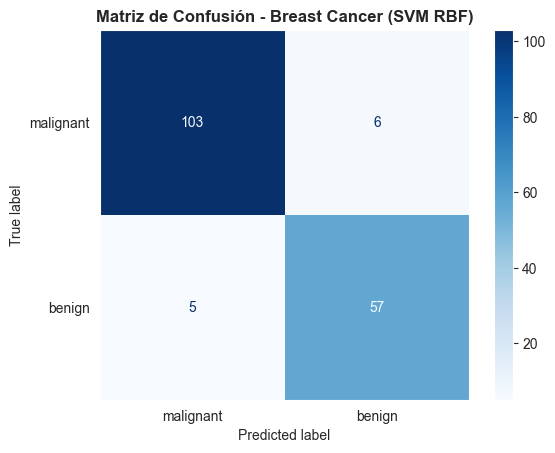

In [5]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train, Y_train = smote.fit_resample(X_train, Y_train)

accuracy_scores = cross_val_score(pipeline, X_train, Y_train, cv=cv, scoring='accuracy')
print("Accuracy:", np.mean(accuracy_scores))

Y_pred = cross_val_predict(pipeline, X_test, Y_test, cv=cv)

print(classification_report(Y_test, Y_pred))

cm = confusion_matrix(Y_test, Y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=df['class'].unique())
disp.plot(cmap="Blues")
plt.title("Matriz de Confusión - Breast Cancer (SVM RBF)", fontweight="bold")
plt.grid(False)
plt.show()

Aún después de haber aplicado SMOTE, se obtuvieron exactamente los mismos resultados. El código de abajo confirma que se aplicó con éxito SMOTE. Ambas clases tienen el mismo número de elementos.

In [6]:
Y_train.value_counts()

class
malignant    248
benign       248
Name: count, dtype: int64

#### **4. Conclusiones**

En este ejemplo, el desempeño del clasificador de soporte vectorial no se vió muy afectado pese al desbalance de clases. Esto muestra que un balance perfecto de clases puede ser deseable mas no indispensable. Aunque SMOTE puede ser benéfico, en algunos casos puede ser contraproducente. Por un lado, el sobremuestreo puede llevar a un sobreajuste y el submuestreo, del otro lado, puede llevar a pérdida de información útil de la clase mayoritaria. 